## Problem 3
### Given the data in problem3.csv
1.  Fit a multivariate normal to the data.
2.  Given that fit, what is the distribution of X2 given X1=0.6. Use the 2 methods describedin class.
3.  Given the properties of the Cholesky Root, create a simulation that proves your distribution of X2 | X1=0.6 is correct.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal

## needed packages

In [7]:
# A. Fit a multivariate normal to the data
# Load the dataset
data = pd.read_csv('problem3.csv')
mean = data.mean().values
cov = data.cov().values
print("Mean of the data:")
print(data.mean())
print("Covariance matrix of the data:")
print(data.cov())
mvn = multivariate_normal(mean=mean, cov=cov)

# print the fitted multivariate normal distribution
print("Fitted multivariate normal distribution:")
print(f"Mean: \n{mvn.mean}")
print(f"Covariance matrix: \n{mvn.cov}")

Mean of the data:
x1    0.046002
x2    0.099915
dtype: float64
Covariance matrix of the data:
          x1        x2
x1  0.010162  0.004924
x2  0.004924  0.020284
Fitted multivariate normal distribution:
Mean: 
[0.04600157 0.09991502]
Covariance matrix: 
[[0.0101622  0.00492354]
 [0.00492354 0.02028441]]


In [13]:
# B. Distribution of X2 given X1=0.6
# Method 1: Conditional distribution using the properties of multivariate normal distribution
x1 = 0.6
mean_x1 = mean[0]
mean_x2 = mean[1]
print(cov)
var_x1 = cov[0, 0]
var_x2 = cov[1,1]
cov_x1x2 = cov[0,1]

# Conditional mean and variance
mean_x2_given_x1 = mean_x2 + cov_x1x2 / var_x1 * (x1 - mean_x1)
var_x2_given_x1 = var_x2 - cov_x1x2**2 / var_x1

print(f"Conditional mean of X2 given X1={x1}: {mean_x2_given_x1}")
print(f"Conditional variance of X2 given X1={x1}: {var_x2_given_x1}")

# Method 2: Using OLS
beta1= cov_x1x2 / var_x1
beta0 = mean_x2 - beta1 * mean_x1
x2_given_x1 = beta0 + beta1 * x1
var_ols = var_x2 - beta1* cov_x1x2

print(f"Conditional mean of X2 given X1={x1} (Method 2): {x2_given_x1}")
print(f"Conditional variance of X2 given X1={x1} (Method 2): {var_ols}")

[[0.0101622  0.00492354]
 [0.00492354 0.02028441]]
Conditional mean of X2 given X1=0.6: 0.3683249958609775
Conditional variance of X2 given X1=0.6: 0.017898969645087522
Conditional mean of X2 given X1=0.6 (Method 2): 0.3683249958609775
Conditional variance of X2 given X1=0.6 (Method 2): 0.017898969645087522


Sample Mean: 0.3687
Sample Variance: 0.0180


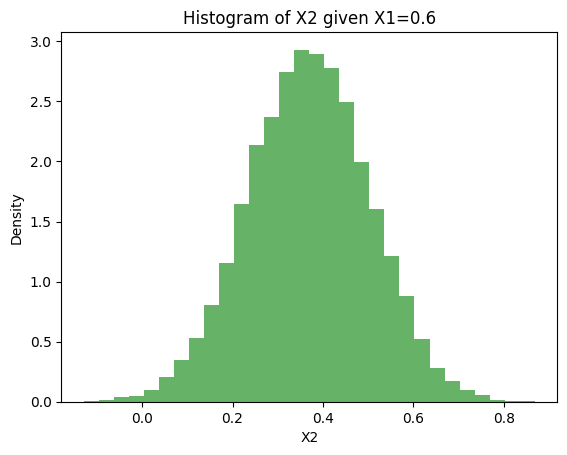

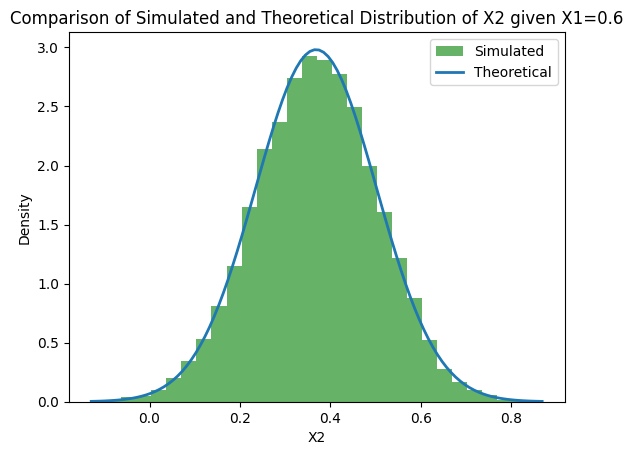

In [11]:
# C. Simulation to prove the distribution of X2 | X1=0.6 is correct
# Using Cholesky decomposition
L = np.linalg.cholesky(cov)
z1=(x1-mean_x1)/np.sqrt(var_x1)

n_samples = 10000
np.random.seed(33)
Z2=np.random.normal(0,1,n_samples)
X2=mean_x2+L[1,0]*z1+L[1,1]*Z2

print(f"Sample Mean: {np.mean(X2):.4f}")
print(f"Sample Variance: {np.var(X2):.4f}")


# Plot the histogram of the conditional samples
plt.hist(X2, bins=30, density=True, alpha=0.6, color='g')
plt.title(f"Histogram of X2 given X1={x1}")
plt.xlabel("X2")
plt.ylabel("Density")
plt.show()


# Show the difference between the simulated distribution and the theoretical distribution
x2_values = np.linspace(min(X2), max(X2), 100)
conditional_pdf = multivariate_normal.pdf(x2_values, mean=mean_x2_given_x1, cov=var_x2_given_x1)

plt.hist(X2, bins=30, density=True, alpha=0.6, color='g', label='Simulated')
plt.plot(x2_values, conditional_pdf, '-', lw=2, label='Theoretical')
plt.title(f"Comparison of Simulated and Theoretical Distribution of X2 given X1={x1}")
plt.xlabel("X2")
plt.ylabel("Density")
plt.legend()
plt.show()